# Project -- #SubscriptIQ — Subscription Retention & Revenue Risk Analytics 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [3]:
df = pd.read_csv("D:\\powerbi\\projects\\Upcoming Project\\ML\\SubscriptIQ — Subscription Retention & Revenue Risk Analytics.csv")

In [4]:
df.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,P_000001,1,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,P_000002,1,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,P_000003,1,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1.0,86.0,5372.0,Moved
3,P_000004,1,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,P_000005,1,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1.0,89.0,5340.0,Competitor had better devices


## Data Cleaning and Modification

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         50000 non-null  object 
 1   Count              50000 non-null  int64  
 2   Country            50000 non-null  object 
 3   State              50000 non-null  object 
 4   City               50000 non-null  object 
 5   Zip Code           50000 non-null  float64
 6   Lat Long           50000 non-null  object 
 7   Latitude           50000 non-null  float64
 8   Longitude          50000 non-null  float64
 9   Gender             50000 non-null  object 
 10  Senior Citizen     50000 non-null  object 
 11  Partner            50000 non-null  object 
 12  Dependents         50000 non-null  object 
 13  Tenure Months      50000 non-null  float64
 14  Phone Service      50000 non-null  object 
 15  Multiple Lines     50000 non-null  object 
 16  Internet Service   500

In [6]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)


In [8]:
df.CustomerID.nunique()

50000

In [9]:
df['Churn Reason'] = df['Churn Reason'].fillna("Unknown")

In [10]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [11]:
df.drop(columns=['Lat Long','Latitude', 'Longitude'],inplace=True)

In [12]:
#Data Type
df['Zip Code'] = df['Zip Code'].astype('Int64',errors='ignore')
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


In [13]:

df['Gender'] = df['Gender'].str.strip().str.title()   # Male, Female
df['Senior Citizen'] = df['Senior Citizen'].map({'Yes': 1, 'No': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['Paperless Billing'] = df['Paperless Billing'].map({'Yes': 1, 'No': 0})
df['Churn Label'] = df['Churn Label'].map({'Yes': 1, 'No': 0})

In [14]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,P_000001,1,United States,California,Los Angeles,90003.0,Male,0,0,0,...,Month-to-month,1,Mailed check,53.85,108.15,1,1.0,86.0,3239.0,Competitor made better offer
1,P_000002,1,United States,California,Los Angeles,90005.0,Female,0,0,1,...,Month-to-month,1,Electronic check,70.70,151.65,1,1.0,67.0,2701.0,Moved
2,P_000003,1,United States,California,Los Angeles,90006.0,Female,0,0,1,...,Month-to-month,1,Electronic check,99.65,820.50,1,1.0,86.0,5372.0,Moved
3,P_000004,1,United States,California,Los Angeles,90010.0,Female,0,1,1,...,Month-to-month,1,Electronic check,104.80,3046.05,1,1.0,84.0,5003.0,Moved
4,P_000005,1,United States,California,Los Angeles,90015.0,Male,0,0,1,...,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,1.0,89.0,5340.0,Competitor had better devices


In [15]:
df.isna().sum()

CustomerID            0
Count                 0
Country               0
State                 0
City                  0
Zip Code              0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        82
Churn Label           0
Churn Value           0
Churn Score           0
CLTV                  0
Churn Reason          0
dtype: int64

In [16]:
df= df.dropna()

# Data Inspection - Statistical View

In [17]:
df.count()

CustomerID           49918
Count                49918
Country              49918
State                49918
City                 49918
Zip Code             49918
Gender               49918
Senior Citizen       49918
Partner              49918
Dependents           49918
Tenure Months        49918
Phone Service        49918
Multiple Lines       49918
Internet Service     49918
Online Security      49918
Online Backup        49918
Device Protection    49918
Tech Support         49918
Streaming TV         49918
Streaming Movies     49918
Contract             49918
Paperless Billing    49918
Payment Method       49918
Monthly Charges      49918
Total Charges        49918
Churn Label          49918
Churn Value          49918
Churn Score          49918
CLTV                 49918
Churn Reason         49918
dtype: int64

In [18]:
df.describe()

,Count,Zip Code,Senior Citizen,Partner,Dependents,Tenure Months,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
count,49918.0,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000,49918.000000
mean,1.0,93513.506594,0.163328,0.482611,0.229376,34.283528,0.593073,65.184031,2294.399408,0.269302,0.391812,58.839581,4404.374938
std,0.0,1863.632281,0.369668,0.499703,0.420436,21.887037,0.491266,29.511178,2277.941587,0.443601,0.332403,21.495949,1177.498563
min,1.0,86023.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,18.800000,0.000000,0.000000,0.020000,16.600000
25%,1.0,92223.000000,0.000000,0.000000,0.000000,16.470000,0.000000,44.102500,399.450000,0.000000,0.110000,43.740000,3597.495000
50%,1.0,93526.575000,0.000000,0.000000,0.000000,32.360000,1.000000,65.500000,1400.550000,0.000000,0.320000,59.025000,4423.040000
75%,1.0,94864.442500,0.000000,1.000000,0.000000,49.667500,1.000000,85.950000,3836.300000,1.000000,0.600000,73.720000,5232.595000
max,1.0,101524.940000,1.000000,1.000000,1.000000,136.790000,1.000000,188.980000,8684.800000,1.000000,2.150000,165.070000,8989.740000


In [19]:
df.groupby('Churn Label').describe()

Count                                    Zip Code  \
               count mean  std  min  25%  50%  75%  max    count   
Churn Label                                                        
0            36475.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  36475.0   
1            13443.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  13443.0   

                           ... Churn Score             CLTV               \
                     mean  ...         75%     max    count         mean   
Churn Label                ...                                             
0            93513.341641  ...       72.07  165.07  36475.0  4416.909949   
1            93513.954162  ...       77.85  150.69  13443.0  4370.363591   

                                                                       
                     std     min      25%      50%       75%      max  
Churn Label                                                            
0            1175.861691   16.60  3613.17  4434.83  5243.575  8965.46  
1            1181.302394  209.24  3558.89  4390.68  5206.510  8989.74  

[2 rows x 96 columns]

# Exploratory Data Analysis

# 1. Customer Demographics

# What’s the distribution of customers by gender, senior citizen status, and dependents?

In [20]:
d= df.groupby('Gender').size()
d

Gender
Female    24812
Male      25106
dtype: int64

<Axes: >

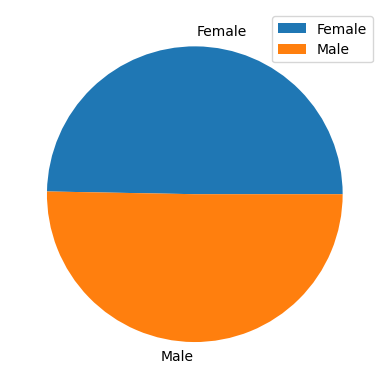

In [21]:
d.plot(kind='pie',legend=True)


In [22]:
d= df.groupby('Senior Citizen').size()
d

Senior Citizen
0    41765
1     8153
dtype: int64

<Axes: ylabel='Senior Citizen'>

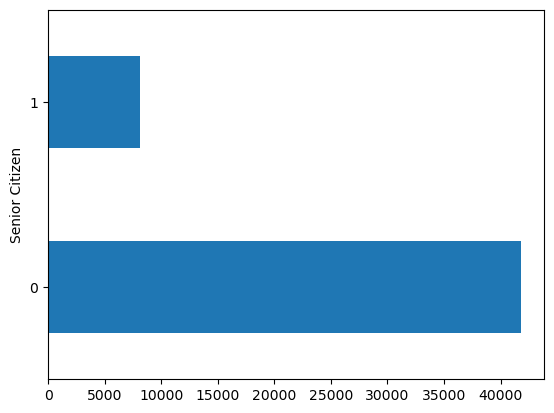

In [23]:
d.plot(kind='barh')

In [24]:
d= df.groupby('Dependents').size()
d

Dependents
0    38468
1    11450
dtype: int64

<Axes: ylabel='Dependents'>

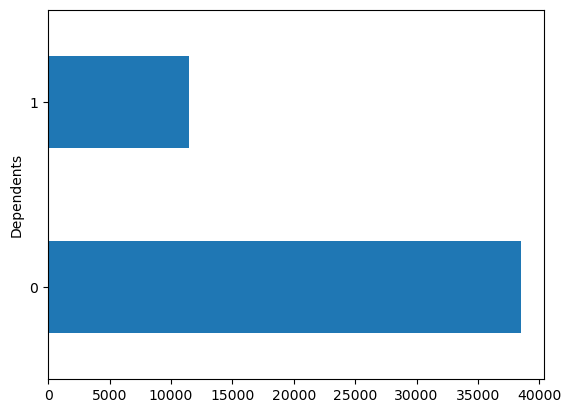

In [25]:
d.plot(kind='barh')

# Do older customers (senior citizens) churn more than younger ones?

In [26]:
df1 = df[df['Churn Label']==1]
c= df1.groupby('Senior Citizen')['Churn Label'].size()
c

Senior Citizen
0    11103
1     2340
Name: Churn Label, dtype: int64

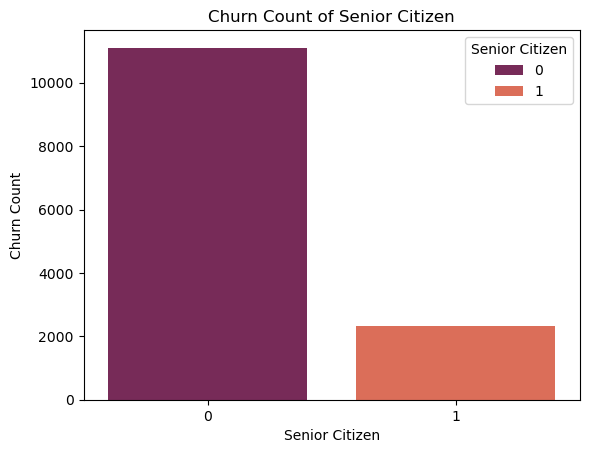

In [27]:
sns.countplot(x='Senior Citizen',  data= df1, hue='Senior Citizen', palette='rocket')
plt.title("Churn Count of Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Churn Count")

plt.show()

# Is there a churn difference between customers with/without dependents or partners?

In [28]:
dep = df1.groupby('Dependents').size()
dep

Dependents
0    10657
1     2786
dtype: int64

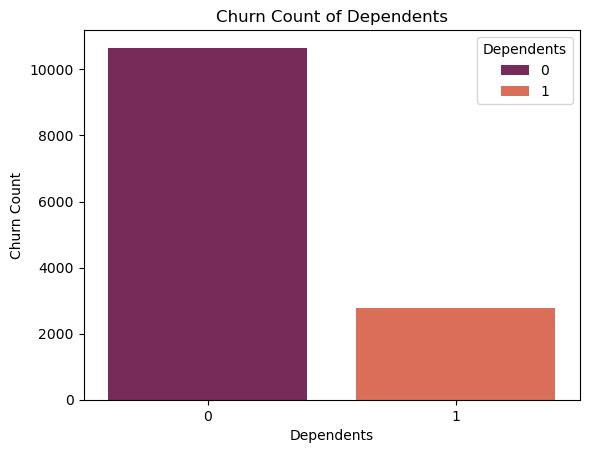

In [29]:
sns.countplot(x='Dependents',  data= df1, hue='Dependents', palette='rocket')
plt.title("Churn Count of Dependents")
plt.xlabel("Dependents")
plt.ylabel("Churn Count")

plt.show()

In [30]:
par = df1.groupby('Partner').size()
par

Partner
0    7181
1    6262
dtype: int64

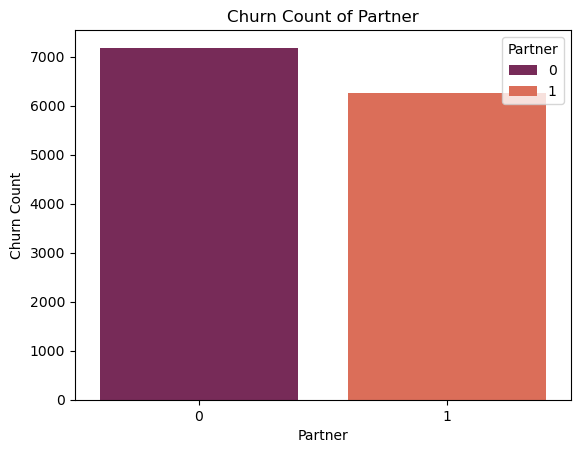

In [31]:
sns.countplot(x='Partner',  data= df1, hue='Partner', palette='rocket')
plt.title("Churn Count of Partner")
plt.xlabel("Partner")
plt.ylabel("Churn Count")

plt.show()

# 2. Geographic Insights

# Which cities have the highest churn rates?

In [32]:
cities = df1.groupby('City').size().sort_values(ascending=False)
cities


City
Los Angeles      561
San Diego        274
San Jose         226
San Francisco    209
Sacramento       205
                ... 
Atascadero         2
Bridgeport         2
San Andreas        2
Richvale           1
Del Rey            1
Length: 1129, dtype: int64

<Axes: xlabel='City'>

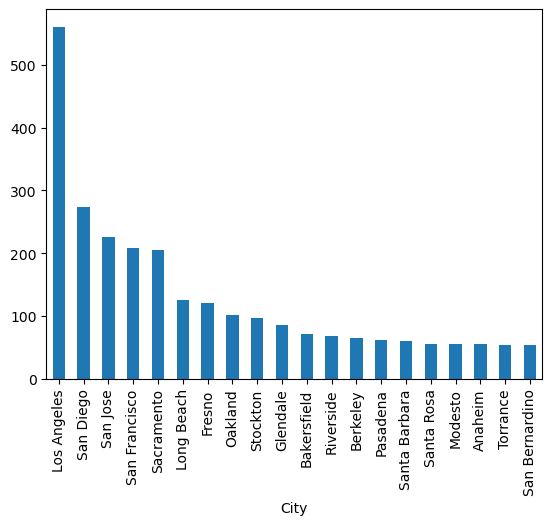

In [33]:
city = cities.head(20)
city.plot(kind='bar')

# Are churn patterns concentrated in specific zip codes or regions?

In [34]:
df1['Zip Code'].nunique()

12656

In [35]:
zip= df1.groupby('Zip Code').size().sort_values(ascending=False)
zip

Zip Code
90020.00     5
91601.00     4
95984.00     4
92273.00     4
94014.00     4
            ..
92740.01     1
92740.46     1
92740.51     1
92740.58     1
101524.94    1
Length: 12656, dtype: int64

<Axes: xlabel='Zip Code'>

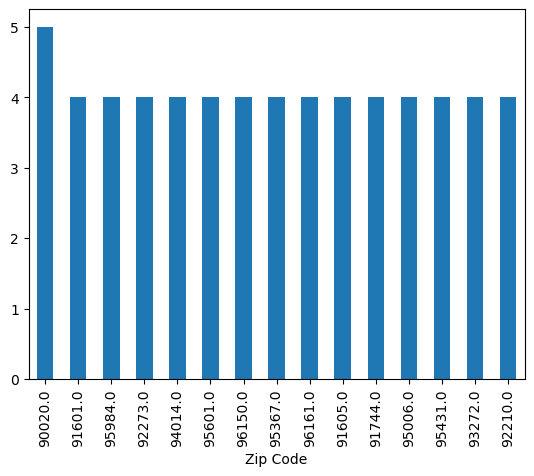

In [36]:
zip_code = zip.head(15)
zip_code.plot(kind='bar')


# 3. Service Usage

# How does churn vary by Internet service type (DSL, Fiber, None)?

In [37]:
df1.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [38]:
inter= df1.groupby('Internet Service').size()
inter

Internet Service
DSL            4535
Fiber optic    6214
No             2694
dtype: int64

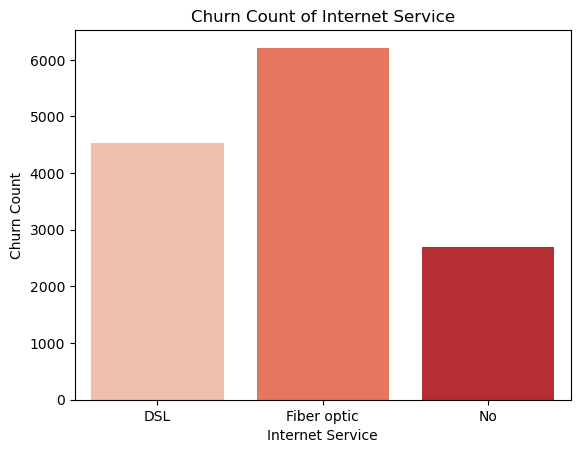

In [39]:
sns.countplot(x='Internet Service',  data= df1, hue='Internet Service', palette='Reds')
plt.title("Churn Count of Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Churn Count")

plt.show()

# Does having multiple services (Streaming, Online Backup, Tech Support) reduce churn?

In [40]:
services = ["Online Security", "Online Backup", "Device Protection", 
            "Tech Support", "Streaming TV", "Streaming Movies"]

churn_by_service = {}

for col in services:
    churn_rate = df.groupby(col)["Churn Value"].mean()
    churn_by_service[col] = churn_rate

# Convert dictionary to DataFrame for readability
churn_by_service_df = pd.DataFrame(churn_by_service)

print(churn_by_service_df)




                     Online Security  Online Backup  Device Protection  \
No                          0.413596       0.410978           0.408870   
No internet service         0.366442       0.365221           0.364132   
Yes                         0.373240       0.384053           0.387516   

                     Tech Support  Streaming TV  Streaming Movies  
No                       0.414865      0.400218          0.399818  
No internet service      0.360551      0.369762          0.366749  
Yes                      0.376885      0.395577          0.397634  


# Do customers with phone service or multiple lines churn more/less?

In [41]:
phone= df1.groupby('Phone Service').size()
phone

Phone Service
No      1303
Yes    12140
dtype: int64

In [42]:
mul = df1.groupby('Multiple Lines').size()
mul

Multiple Lines
No                  6449
No phone service    1325
Yes                 5669
dtype: int64

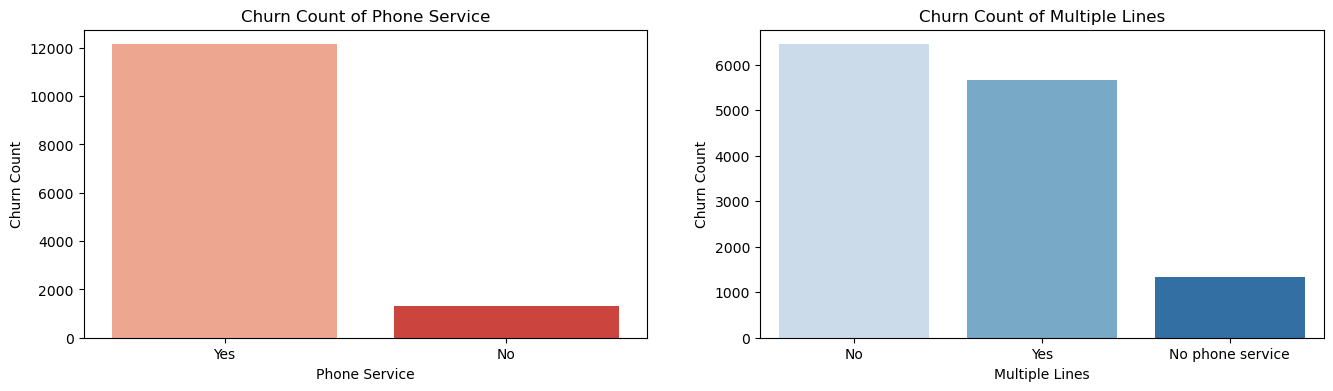

In [43]:

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)

sns.countplot(x='Phone Service',  data= df1, hue='Phone Service', palette='Reds')
plt.title("Churn Count of Phone Service")
plt.xlabel("Phone Service")
plt.ylabel("Churn Count")



plt.subplot(1,2,2)

sns.countplot(x='Multiple Lines',  data= df1, hue='Multiple Lines', palette='Blues')
plt.title("Churn Count of Multiple Lines")
plt.xlabel("Multiple Lines")
plt.ylabel("Churn Count")

plt.show()


In [44]:
## Using Phone Services has high churn in comparison to Multiple Line.

# 4. Contract & Billing

# What’s the churn rate by contract type (Month-to-month, 1 year, 2 years)?

In [45]:
tenure = df1.groupby('Tenure Months').size().sort_values(ascending=False)
tenure

Tenure Months
1.00      380
2.00      125
3.00       96
4.00       83
5.00       69
         ... 
35.48       1
35.54       1
35.55       1
35.57       1
124.90      1
Length: 6027, dtype: int64

# How does payment method (Credit card, Bank transfer, Electronic check) impact churn?

In [46]:
method = df1.groupby('Payment Method').size().sort_values(ascending=False)
method

Payment Method
Electronic check             4994
Mailed check                 3013
Bank transfer (automatic)    2811
Credit card (automatic)      2625
dtype: int64

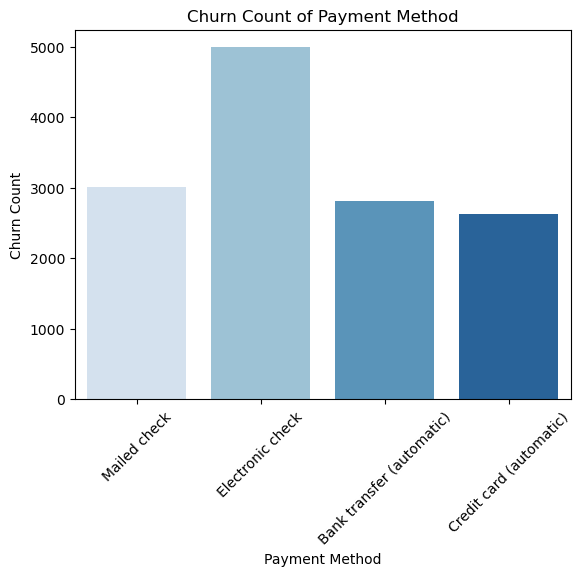

In [47]:
sns.countplot(x='Payment Method',  data= df1, hue='Payment Method', palette='Blues')
plt.title("Churn Count of Payment Method")
plt.xticks(rotation= 45)
plt.xlabel("Payment Method")
plt.ylabel("Churn Count")

plt.show()

# Does paperless billing increase churn?

In [48]:
paper = df1.groupby('Paperless Billing').size()
paper

Paperless Billing
0    5180
1    8263
dtype: int64

# 5. Financial Metrics

# What’s the average Monthly Charges & Total Charges for churned vs retained customers?

In [49]:
# Monthly Charges

mon = df.groupby('Churn Label',as_index=False)['Monthly Charges'].mean()
mon

,Churn Label,Monthly Charges
0,0,64.672885
1,1,66.570927


In [50]:
# Total Charges

total = df.groupby('Churn Label',as_index=False)['Total Charges'].mean()
total

,Churn Label,Total Charges
0,0,2336.810181
1,1,2179.325917


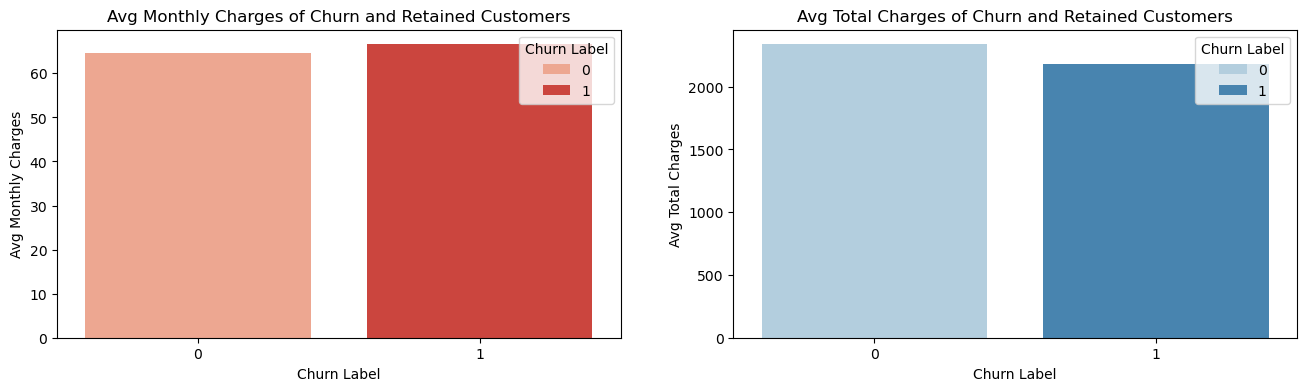

In [51]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)

sns.barplot(x='Churn Label',y= 'Monthly Charges'  ,  data= mon, hue='Churn Label', palette='Reds')
plt.title("Avg Monthly Charges of Churn and Retained Customers")
plt.xlabel("Churn Label")
plt.ylabel('Avg Monthly Charges')



plt.subplot(1,2,2)

sns.barplot(x='Churn Label',y ="Total Charges" , data= total, hue='Churn Label', palette='Blues')
plt.title("Avg Total Charges of Churn and Retained Customers")
plt.xlabel('Churn Label')
plt.ylabel("Avg Total Charges")

plt.show()


# Do high-paying customers churn more frequently?

   index SpendingCategory  Churn Value
0      0              Low     0.375055
1      1           Medium     0.400606
2      2             High     0.399782


C:\Users\SHAURYA CHAND\AppData\Local\Temp\ipykernel_332408\2236876942.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_spending = df.groupby('SpendingCategory',as_index=False)['Churn Value'].mean().reset_index()


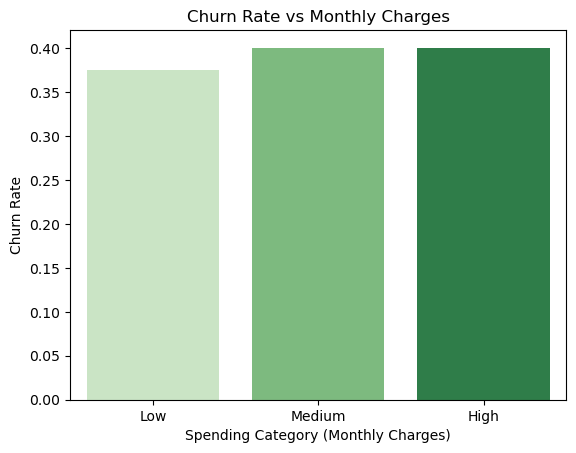

In [52]:

# Create spending categories using quantiles
df['SpendingCategory'] = pd.qcut(df['Monthly Charges'], 
                                 q=3, 
                                 labels=['Low', 'Medium', 'High'])

# Calculate churn rate for each spending category
churn_by_spending = df.groupby('SpendingCategory',as_index=False)['Churn Value'].mean().reset_index()

print(churn_by_spending)


sns.barplot(x='SpendingCategory', y='Churn Value', data=churn_by_spending, hue='SpendingCategory',palette='Greens')

plt.xlabel("Spending Category (Monthly Charges)")
plt.ylabel("Churn Rate")
plt.title("Churn Rate vs Monthly Charges")
plt.show()


# What’s the CLTV (Customer Lifetime Value) difference between churned and retained customers?

In [53]:
cltv= df.groupby('Churn Label',as_index=False)['CLTV'].sum()
cltv

,Churn Label,CLTV
0,0,1.611068e+08
1,1,5.875080e+07


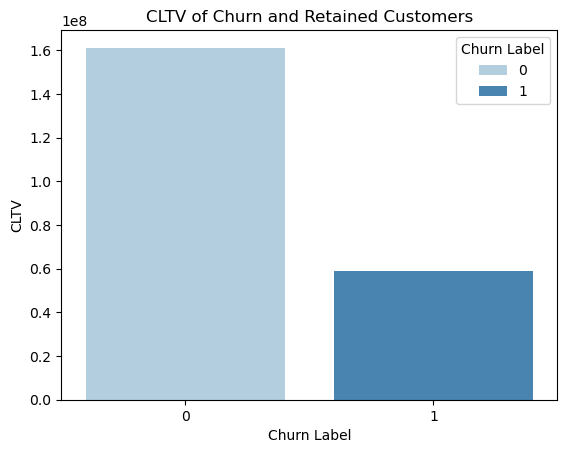

In [54]:
sns.barplot(x='Churn Label',y ='CLTV' , data= cltv, hue='Churn Label', palette='Blues')
plt.title("CLTV of Churn and Retained Customers")
plt.xlabel('Churn Label')
plt.ylabel('CLTV')

plt.show()

# 6. Correlation

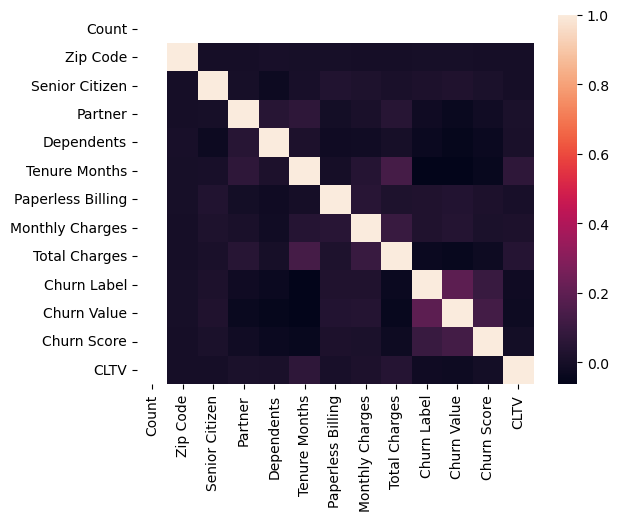

In [55]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

# Machine Learning Model

# Preprocessing


In [56]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason',
       'SpendingCategory'],
      dtype='object')

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
X= df.drop(columns=['CustomerID','Count','Country', 'State', 'City', 'Zip Code','Churn Reason','Churn Label','Churn Value', 'Churn Score'])
y= df['Churn Label']


In [59]:
X =pd.get_dummies(X,drop_first=True)

In [60]:
X.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'CLTV',
       'Gender_Male', 'Phone Service_Yes', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No internet service',
       'Streaming Movies_Yes', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'SpendingCategory_Medium', 'SpendingCategory_High'],
      dtype='object')

# Models

In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)
print(importances.head(10))


                 feature  importance
6          Total Charges    0.136830
3          Tenure Months    0.136809
5        Monthly Charges    0.134453
7                   CLTV    0.132674
8            Gender_Male    0.023141
1                Partner    0.021749
11    Multiple Lines_Yes    0.021550
25  Streaming Movies_Yes    0.020411
4      Paperless Billing    0.020236
23      Streaming TV_Yes    0.019486


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}


all_reports = {}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name)
    
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    
    all_reports[name] = pd.DataFrame(report).transpose()




combined_df = pd.concat(all_reports, axis=0)



c:\Users\SHAURYA CHAND\anoconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\SHAURYA CHAND\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SHAURYA CHAND\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being se

Logistic Regression
Decision Tree
Random Forest
SVM


c:\Users\SHAURYA CHAND\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SHAURYA CHAND\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SHAURYA CHAND\anoconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
combined_df

precision    recall  f1-score      support
Logistic Regression 0              0.730669  1.000000  0.844378  7295.000000
                    1              0.000000  0.000000  0.000000  2689.000000
                    accuracy       0.730669  0.730669  0.730669     0.730669
                    macro avg      0.365335  0.500000  0.422189  9984.000000
                    weighted avg   0.533877  0.730669  0.616961  9984.000000
Decision Tree       0              0.747343  0.722961  0.734950  7295.000000
                    1              0.309532  0.336928  0.322650  2689.000000
                    accuracy       0.618990  0.618990  0.618990     0.618990
                    macro avg      0.528438  0.529945  0.528800  9984.000000
                    weighted avg   0.629427  0.618990  0.623905  9984.000000
Random Forest       0              0.741339  0.988485  0.847256  7295.000000
                    1              0.673152  0.064336  0.117447  2689.000000
                    accuracy       0.739583  0.739583  0.739583     0.739583
                    macro avg      0.707245  0.526411  0.482352  9984.000000
                    weighted avg   0.722974  0.739583  0.650696  9984.000000
SVM                 0              0.730669  1.000000  0.844378  7295.000000
                    1              0.000000  0.000000  0.000000  2689.000000
                    accuracy       0.730669  0.730669  0.730669     0.730669
                    macro avg      0.365335  0.500000  0.422189  9984.000000
                    weighted avg   0.533877  0.730669  0.616961  9984.000000

In [65]:
clf.score(X_test,y_test)

0.7306690705128205

In [66]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

df['churn_prob'] = best_model.predict_proba(X)[:,1]


In [67]:
risk_segments = df.groupby('Contract')['churn_prob'].mean().sort_values(ascending=False)
print(risk_segments)


Contract
Month-to-month    0.297433
One year          0.255538
Two year          0.245773
Name: churn_prob, dtype: float64


In [70]:
risk_segments = df.groupby('SpendingCategory')['churn_prob'].mean().sort_values(ascending=False)
print(risk_segments)

SpendingCategory
High      0.289793
Medium    0.278639
Low       0.260897
Name: churn_prob, dtype: float64


C:\Users\SHAURYA CHAND\AppData\Local\Temp\ipykernel_332408\2859296689.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_segments = df.groupby('SpendingCategory')['churn_prob'].mean().sort_values(ascending=False)


In [72]:
risk_segments = df.groupby('Senior Citizen')['churn_prob'].mean().sort_values(ascending=False)
print(risk_segments)

Senior Citizen
1    0.295421
0    0.272735
Name: churn_prob, dtype: float64


In [74]:
risk_segments = df.groupby('Internet Service')['churn_prob'].mean().sort_values(ascending=False)
print(risk_segments)

Internet Service
Fiber optic    0.293943
DSL            0.269594
No             0.252501
Name: churn_prob, dtype: float64


In [79]:
risk_segments = df.groupby('Phone Service')['churn_prob'].mean().sort_values(ascending=False)
print(risk_segments)

Phone Service
No     0.285573
Yes    0.275484
Name: churn_prob, dtype: float64


In [81]:
risk_segments = df.groupby('Payment Method')['churn_prob'].mean().sort_values(ascending=False)
print(risk_segments)

Payment Method
Electronic check             0.303528
Mailed check                 0.270859
Bank transfer (automatic)    0.265301
Credit card (automatic)      0.251266
Name: churn_prob, dtype: float64


In [85]:
risk_segments = df.groupby('Streaming Movies')['churn_prob'].mean().sort_values(ascending=False)
print(risk_segments)

Streaming Movies
No                     0.284040
Yes                    0.281064
No internet service    0.254258
Name: churn_prob, dtype: float64


In [68]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason',
       'SpendingCategory', 'churn_prob'],
      dtype='object')